In [ ]:
# import pyodbc

# #連線
# server = 'sqyhi03az.database.windows.net'
# username = 'irentadmin'
# password = 'hims@QaWsEd'
# database = 'IRENT_V2'
# driver = '{ODBC Driver 17 for SQL Server}'
# connectionString = f'DRIVER={driver};PORT=1433;SERVER={server};DATABASE={database};UID={username};PWD={password}'
# cnxn = pyodbc.connect(connectionString)
# sql = "select * from tb_memberdata with(nolock) where memidno in('A129425984','G221795414')"
# #直接把sql資料塞進df，太屌了傑克
# data = pd.read_sql(sql,cnxn)

# cnxn.close()

In [ ]:
# data

In [ ]:
# data = data.drop(['A_PRGID','A_USERID','A_SYSDT'],axis=1)
# data = data.drop(columns=['U_PRGID','U_USERID','U_SYSDT'])

#### 汽車租借時段數量圖（小時為單位，直條圖或趨勢線圖）

In [1]:
import pandas as pd
df = pd.read_csv('./data/data1.csv')
df.head()

,order_number,IDNO,CarNo,City,ZipCode,email,ProjID,lend_place,return_place,start_time,...,monthly_workday,monthly_holiday,Etag,already_payment,start_mile,end_mile,trade_status,parkingFee,parkingSpace,TransDiscount
0,14124187,E124892738,RBX-2756,0,NaN,NaN,R220,X0QR,X0QR,2022-01-08 08:30:00.000,...,0.0,0,209,1,106788,107224,1,0,藍昌路停車場,0
1,14146283,T122969952,RBX-5082,0,NaN,NaN,R220,X1C2,X1C2,2022-01-08 10:00:00.000,...,0.0,0,0,1,64104,64159,1,0,NaN,0
2,14190595,F227715713,RBY-5787,0,NaN,NaN,R220,X0LF,X0LF,2022-01-07 19:00:00.000,...,0.0,0,40,1,120841,121055,1,0,NaN,0
3,14197077,F125726869,RBX-2661,0,NaN,NaN,R220,X2Q0,X2Q0,2022-01-08 07:00:00.000,...,0.0,0,292,1,108633,109304,1,0,NaN,0
4,14327768,N125402833,RBX-2831,0,NaN,NaN,R220,X2EZ,X2EZ,2022-01-08 04:30:00.000,...,0.0,0,250,1,105812,106490,1,0,惠文停車場 30號,0


In [2]:
df = df.loc[:,['start_time']]

In [3]:
df['start_time'][0]

'2022-01-08 08:30:00.000'

In [4]:
print(df.shape[0])
print(df.shape[1])

15409
1


In [5]:
lst = [df.columns[i] for i in range(df.shape[1])]
lst

['start_time']

In [6]:
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        df[lst[j]][i] = df[lst[j]][i][:-10].replace('-','').replace(' ','')

In [7]:
df.head()

,start_time
0,2022010808
1,2022010810
2,2022010719
3,2022010807
4,2022010804


In [8]:
a = df.groupby('start_time')

In [9]:
a

In [10]:
a.size().head()

start_time
2022010700    176
2022010701    126
2022010702     78
2022010703     51
2022010704     49
dtype: int64

In [11]:
b = pd.Series(a.size())

In [12]:
b.head()

start_time
2022010700    176
2022010701    126
2022010702     78
2022010703     51
2022010704     49
dtype: int64

In [16]:
lst_b = list(b.index)
lst_b[0]

'2022010700'

In [17]:
lst_b_num = list(b)
lst_b_num[0]

176

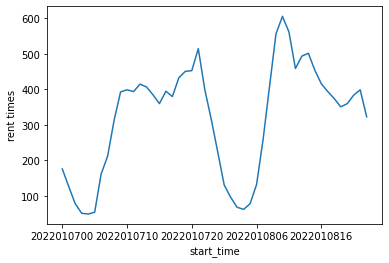

In [25]:
import matplotlib.pyplot as plt 
b.plot() #這樣寫則x軸不會顯示所有的，只會每10筆顯示一次 
# plt.plot(b)
plt.ylabel("rent times")
plt.show()

In [29]:
lst_b[0][-2:] #只取小時

'00'

In [30]:
len(lst_b)

48

In [31]:
import numpy as np

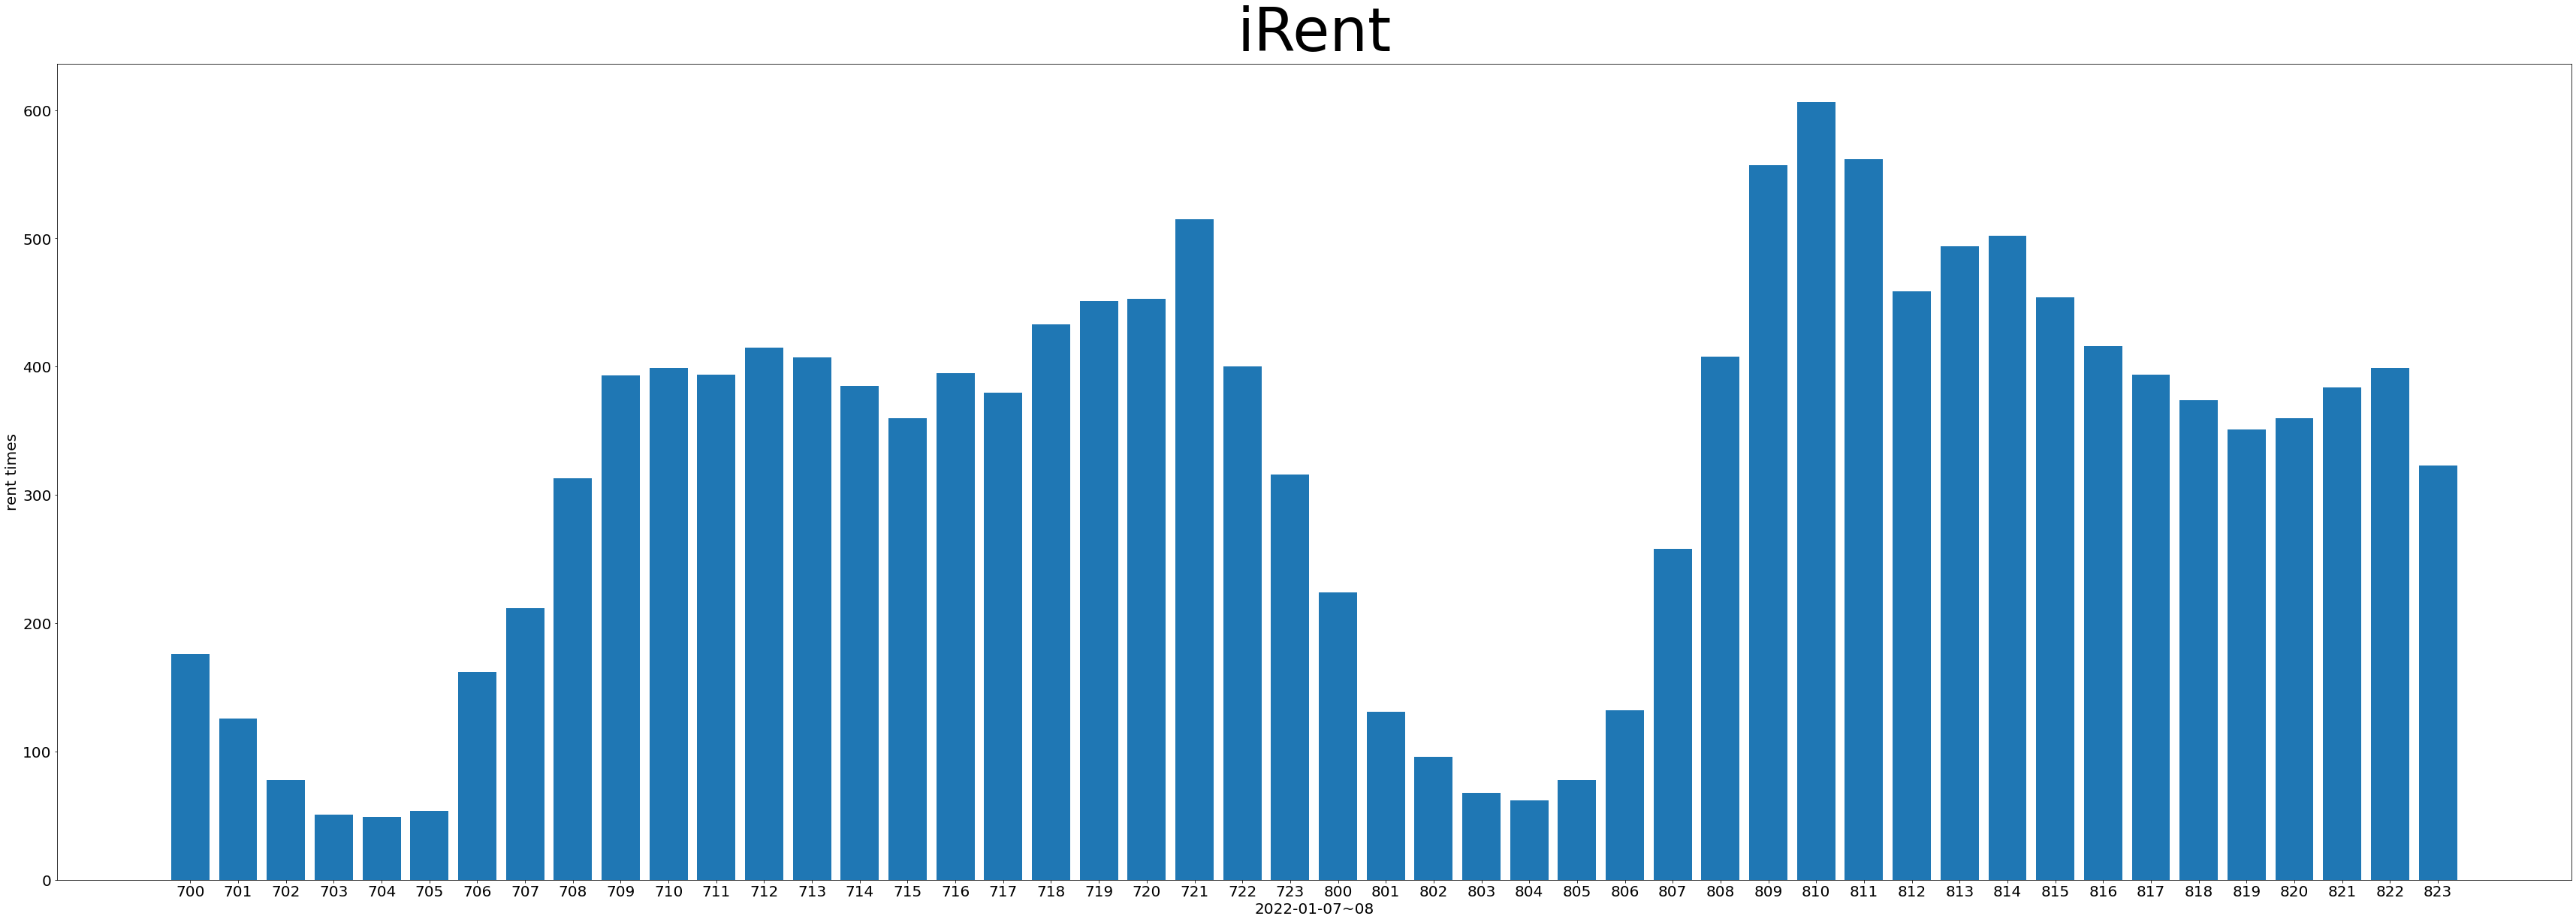

In [32]:
for i in range(len(lst_b)):
    lst_b[i] = lst_b[i][-3:] #只取小時

# 皆可
# x = lst_b
# y = lst_b_num
x = np.array(lst_b) 
y = np.array(lst_b_num)

# plt.figure(figsize=(60,20))
plt.rcParams["figure.figsize"] = (60, 20) #設定整張圖大小
plt.title("iRent",fontsize=80) 
plt.xlabel("2022-01-07~08",fontsize=20) 
plt.ylabel("rent times",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.bar(x, y) # 繪製長條圖
plt.show() # 顯現圖形 

In [33]:
x1 = x[0:24]
x2 = x[24:]
y1 = y[0:24]
y2 = y[24:]

In [34]:
#x1、x2原本是代表7號和8號的小時，如700~723、800~823，我現在只取後兩位，不然折縣圖無法做對比
for i in range(len(x1)):
    x1[i] = x1[i][-2:]
    x2[i] = x2[i][-2:]

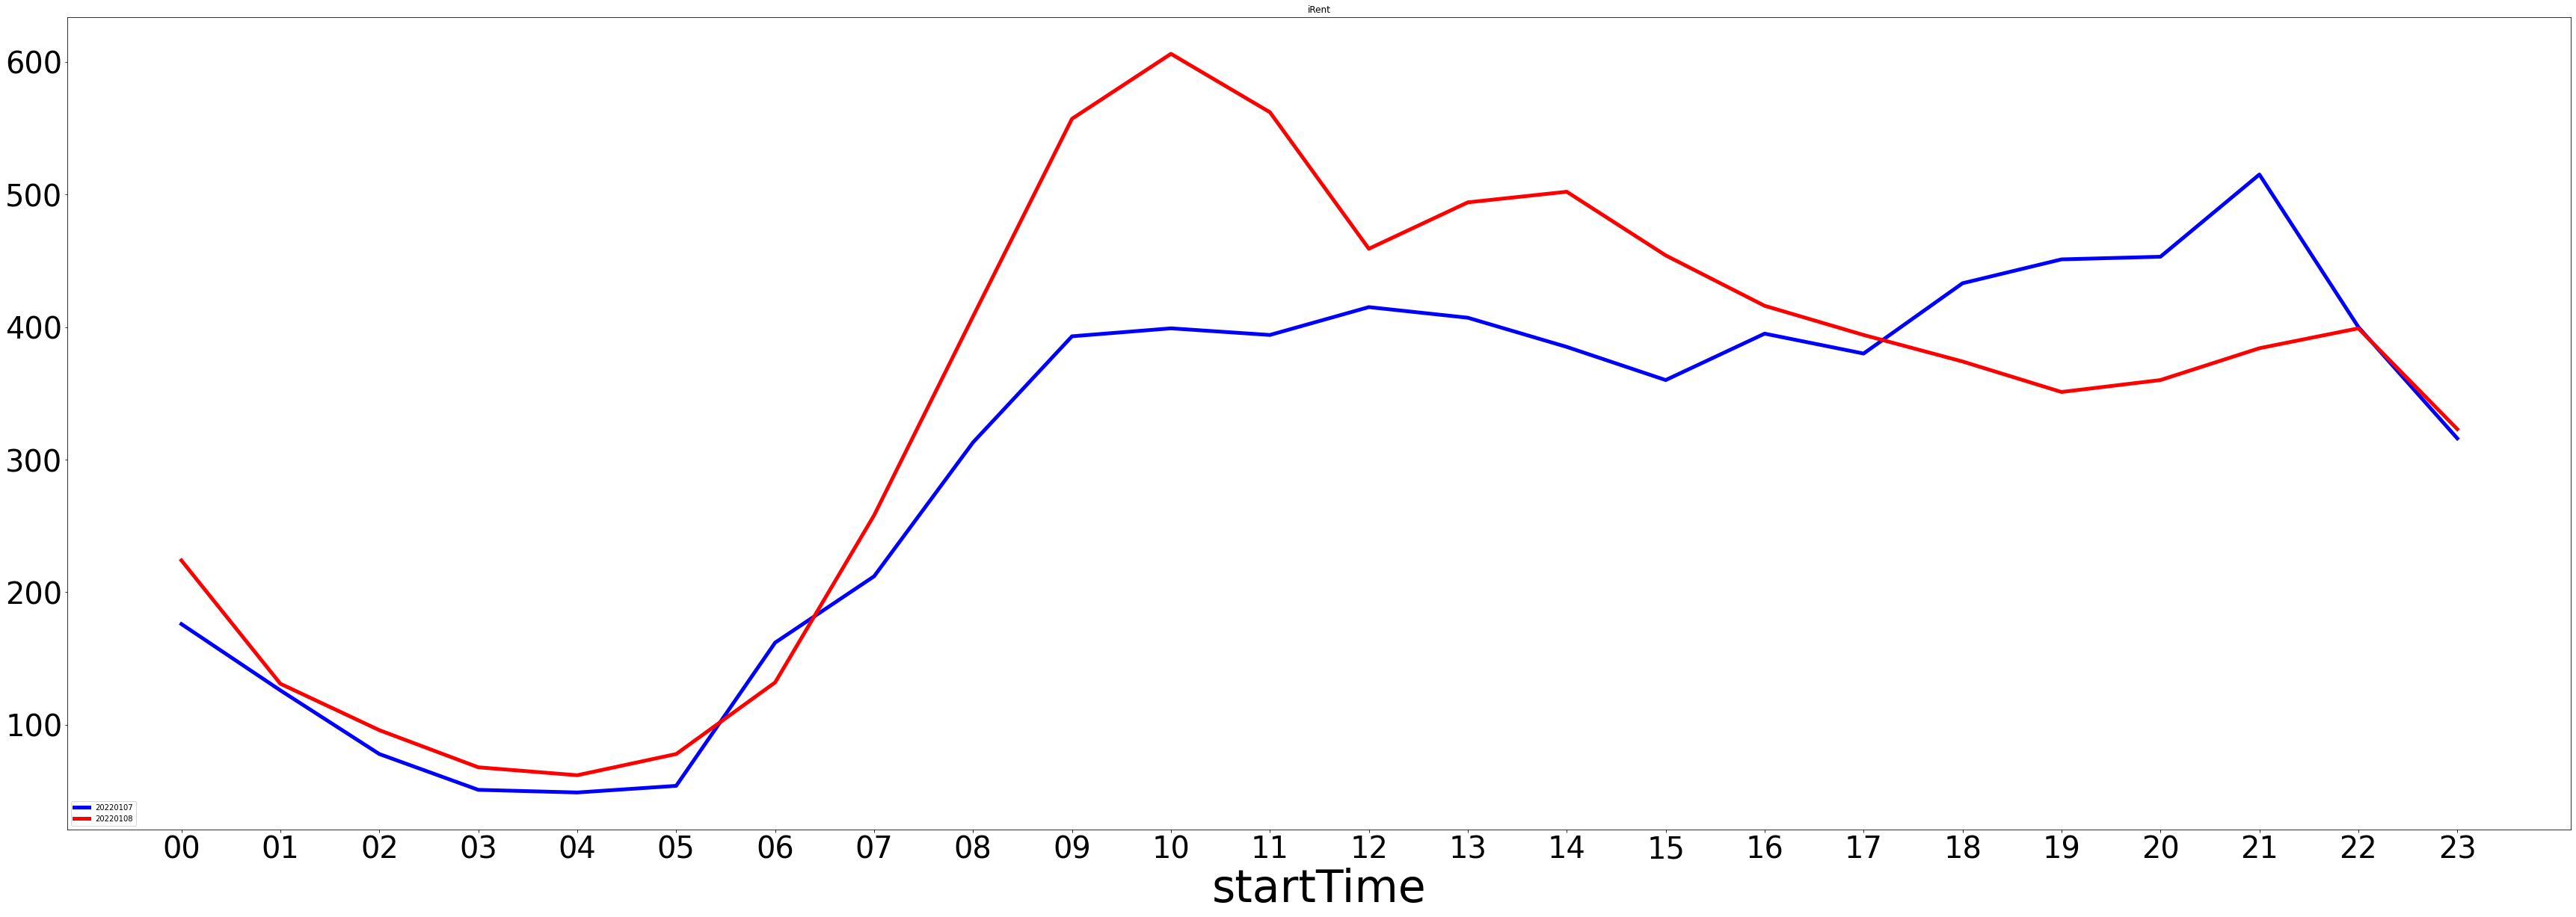

In [43]:
plt.plot(x1, y1, color='b',label='20220107', linewidth=5)
plt.plot(x2, y2, color='r',label='20220108', linewidth=5)
plt.xlabel('startTime',fontsize=60) # 設定x軸標題
# plt.xticks(x1, rotation='vertical',fontsize=40) # 設定x軸label以及垂直顯示
plt.xticks(fontsize=40) # 設定x軸label以及垂直顯示
plt.yticks(fontsize=40)
plt.title('iRent') # 設定圖表標題
plt.legend(loc = 'lower left')
plt.show()

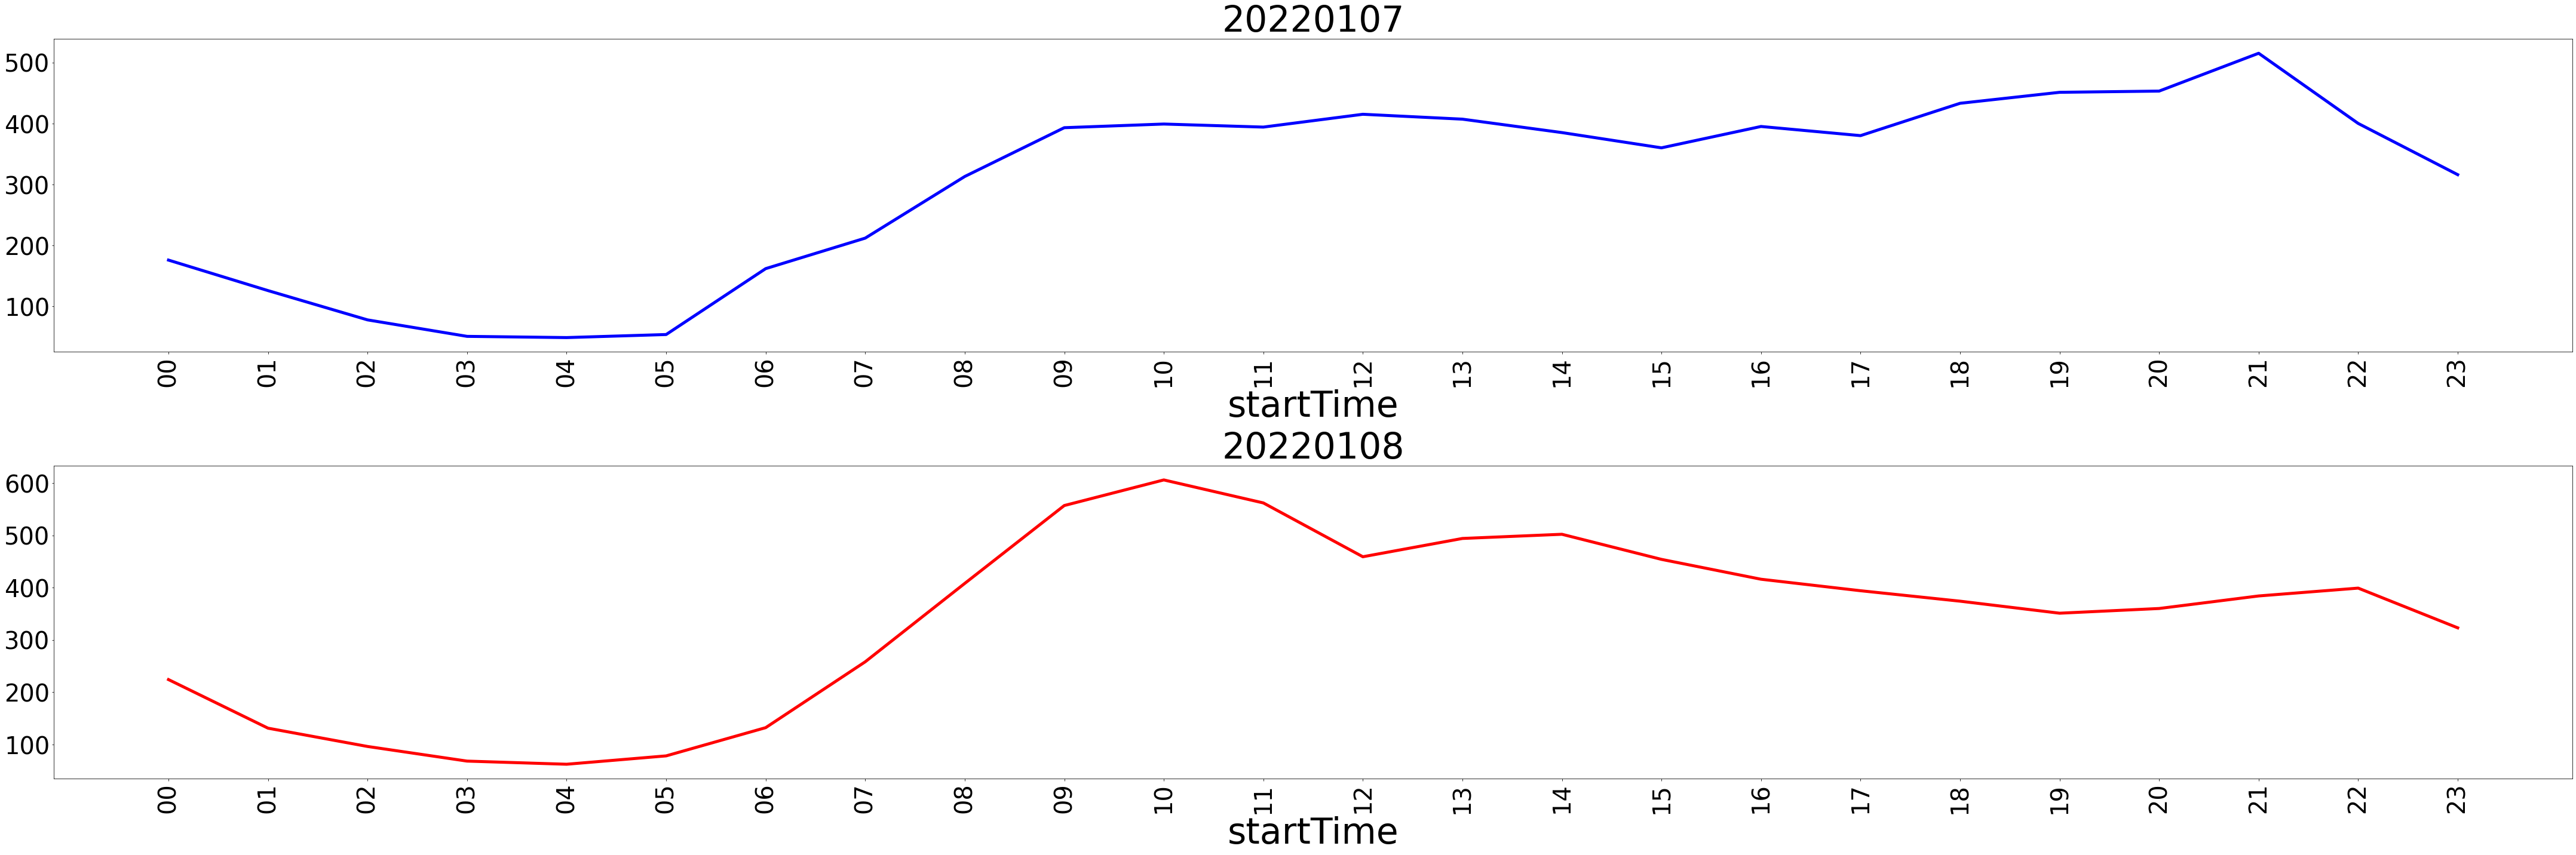

In [42]:
plt.subplot(2, 1 ,1)
plt.plot(x1, y1, 'b', linewidth=5)
plt.xlabel('startTime',fontsize=60)
plt.xticks(x1, rotation='vertical',fontsize=40)
plt.yticks(fontsize=40)
plt.title('20220107',fontsize=60)

plt.subplot(2, 1 ,2)
plt.plot(x2, y2, 'r', linewidth=5)
plt.xlabel('startTime',fontsize=60)
plt.xticks(x2, rotation='vertical',fontsize=40)
plt.yticks(fontsize=40)
plt.title('20220108',fontsize=60)
plt.tight_layout() #隔開兩個圖
plt.show()

#### 租還機車熱點套用地圖顯示

In [47]:
import geopandas as gpd
gdf_Rail=gpd.read_file('data/Taiwan_SHP/TOWN_MOI_1100415.shp',encoding='utf-8')
gdf_Rail.head() #讀取為GeoDataFrame

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."


In [52]:
# 把geopandas轉pandas，因為我要看所有列資訊，但geopandas不支援
df_FromGeo = pd.DataFrame(gdf_Rail.iloc[:,:-1].values, columns = list(gdf_Rail.columns.values)[:-1])
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
df_FromGeo.sort_values('COUNTYNAME')

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE
82,M07,10008070,南投縣,鹿谷鄉,Lugu Township,M,10008
77,M02,10008020,南投縣,埔里鎮,Puli Township,M,10008
76,M01,10008010,南投縣,南投市,Nantou City,M,10008
80,M05,10008050,南投縣,集集鎮,Jiji Township,M,10008
81,M06,10008060,南投縣,名間鄉,Mingjian Township,M,10008
83,M08,10008080,南投縣,中寮鄉,Zhongliao Township,M,10008
84,M09,10008090,南投縣,魚池鄉,Yuchi Township,M,10008
85,M10,10008100,南投縣,國姓鄉,Guoxing Township,M,10008
86,M11,10008110,南投縣,水里鄉,Shuili Township,M,10008
87,M12,10008120,南投縣,信義鄉,Xinyi Township,M,10008


In [53]:
# gdf_Rail.drop(317,axis=0)

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."
5,N07,10007120,彰化縣,田中鎮,Tianzhong Township,N,10007,"POLYGON ((120.58250 23.87650, 120.58251 23.876..."
6,N19,10007170,彰化縣,社頭鄉,Shetou Township,N,10007,"POLYGON ((120.58558 23.87687, 120.58506 23.876..."
7,T14,10013140,屏東縣,竹田鄉,Zhutian Township,T,10013,"POLYGON ((120.50461 22.57315, 120.50464 22.573..."
8,T05,10013050,屏東縣,萬丹鄉,Wandan Township,T,10013,"POLYGON ((120.50461 22.57315, 120.50453 22.573..."
9,K13,10005160,苗栗縣,三灣鄉,Sanwan Township,K,10005,"POLYGON ((121.00808 24.64440, 121.00798 24.644..."


<AxesSubplot:>

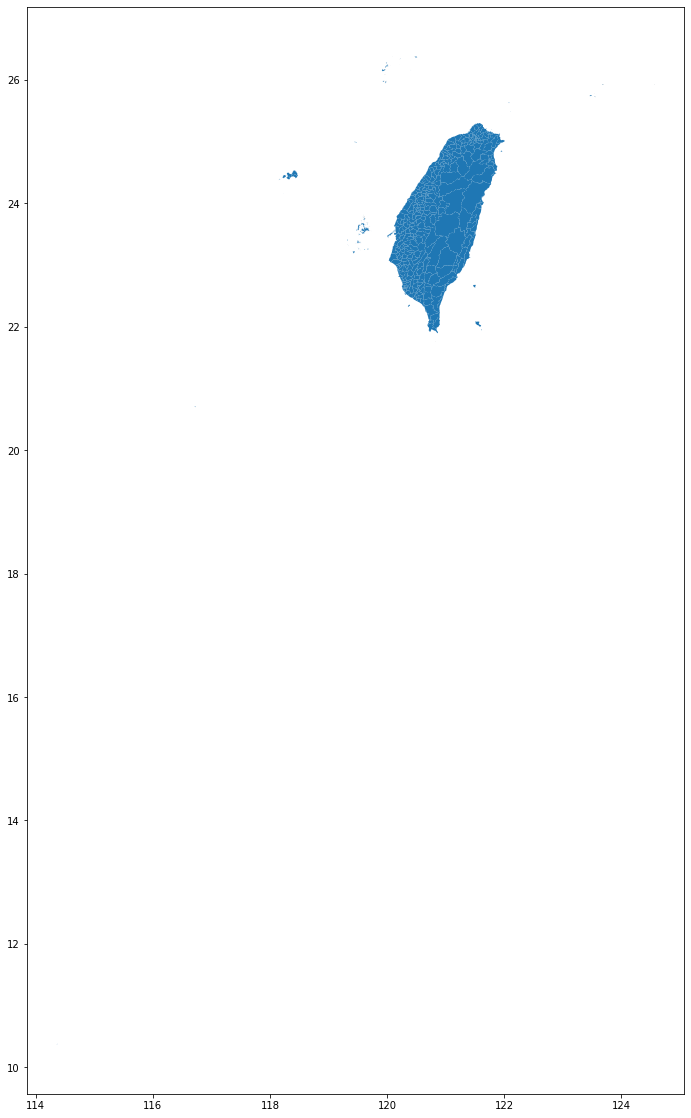

In [54]:
gdf_Rail.plot()

In [98]:
# GeoDataFrame的許多基本操作與Pandas的DataFrame很像

In [99]:
# gdf_Rail.index[gdf_Rail["COUNTYNAME"]=="臺北市"]
# subset=gdf_Rail.iloc[[150,151,331,332,333,334,335,336,337,338,339,340]]
# subset.head()
# 下個cell的方法比較好

In [105]:
filt = (gdf_Rail['COUNTYNAME'] == '臺北市') | (gdf_Rail['COUNTYNAME'] == '新北市')
subset = gdf_Rail.loc[filt]
subset.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
150,A02,63000030,臺北市,大安區,Da'an District,A,63000,"POLYGON ((121.54384 25.04491, 121.54407 25.044..."
151,A11,63000080,臺北市,文山區,Wenshan District,A,63000,"POLYGON ((121.59725 25.01439, 121.59724 25.014..."
207,F33,65000040,新北市,永和區,Yonghe District,F,65000,"POLYGON ((121.51239 25.02175, 121.51255 25.021..."
208,F07,65000060,新北市,新店區,Xindian District,F,65000,"POLYGON ((121.60922 24.96402, 121.60929 24.963..."
209,F19,65000130,新北市,土城區,Tucheng District,F,65000,"POLYGON ((121.46714 24.99298, 121.46716 24.993..."


<AxesSubplot:>

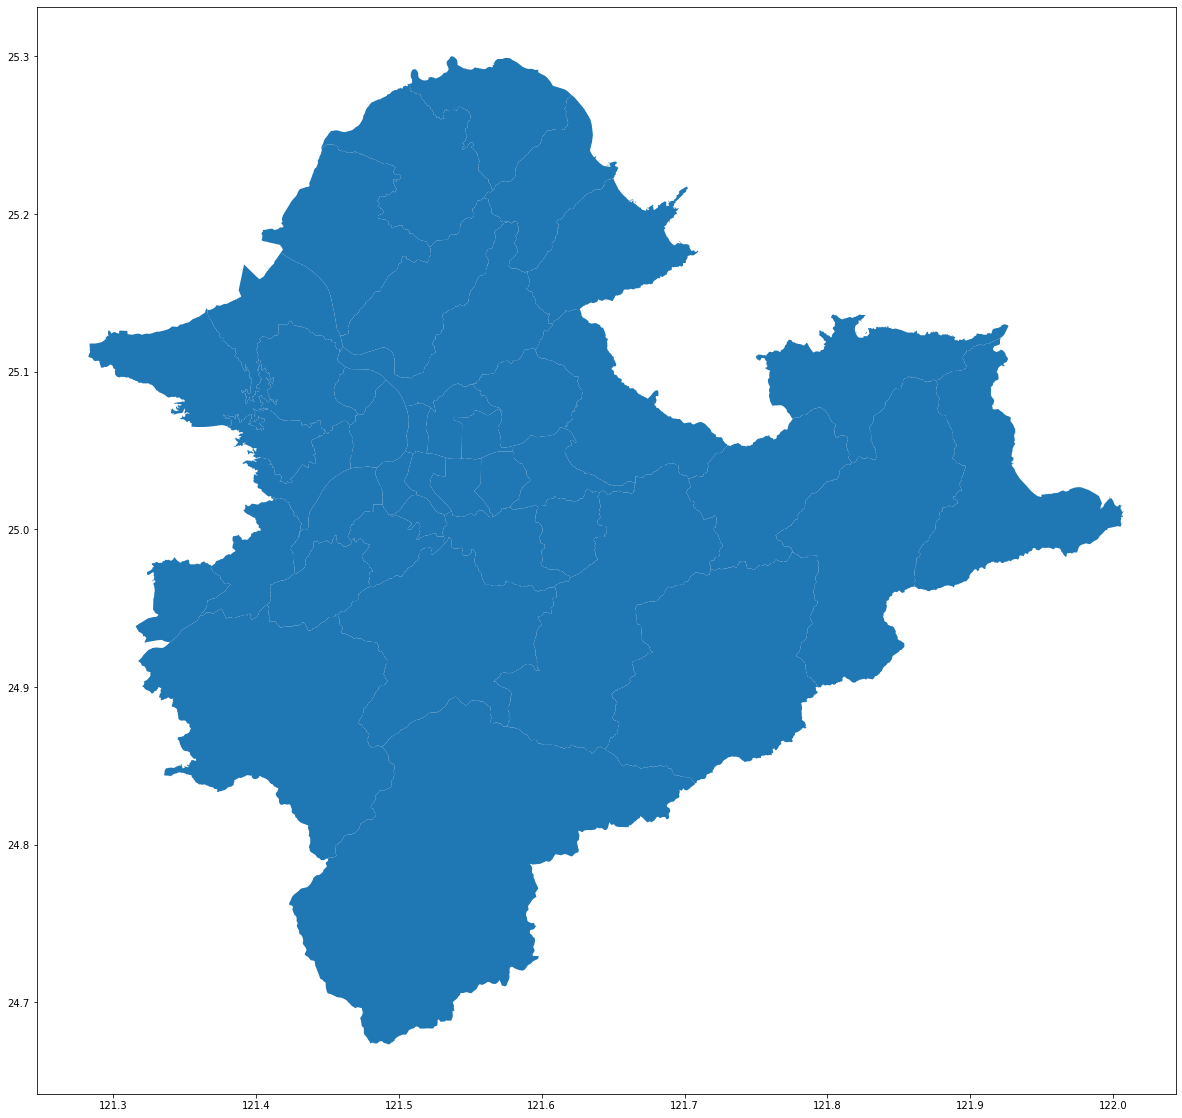

In [104]:
subset.plot()

<AxesSubplot:>

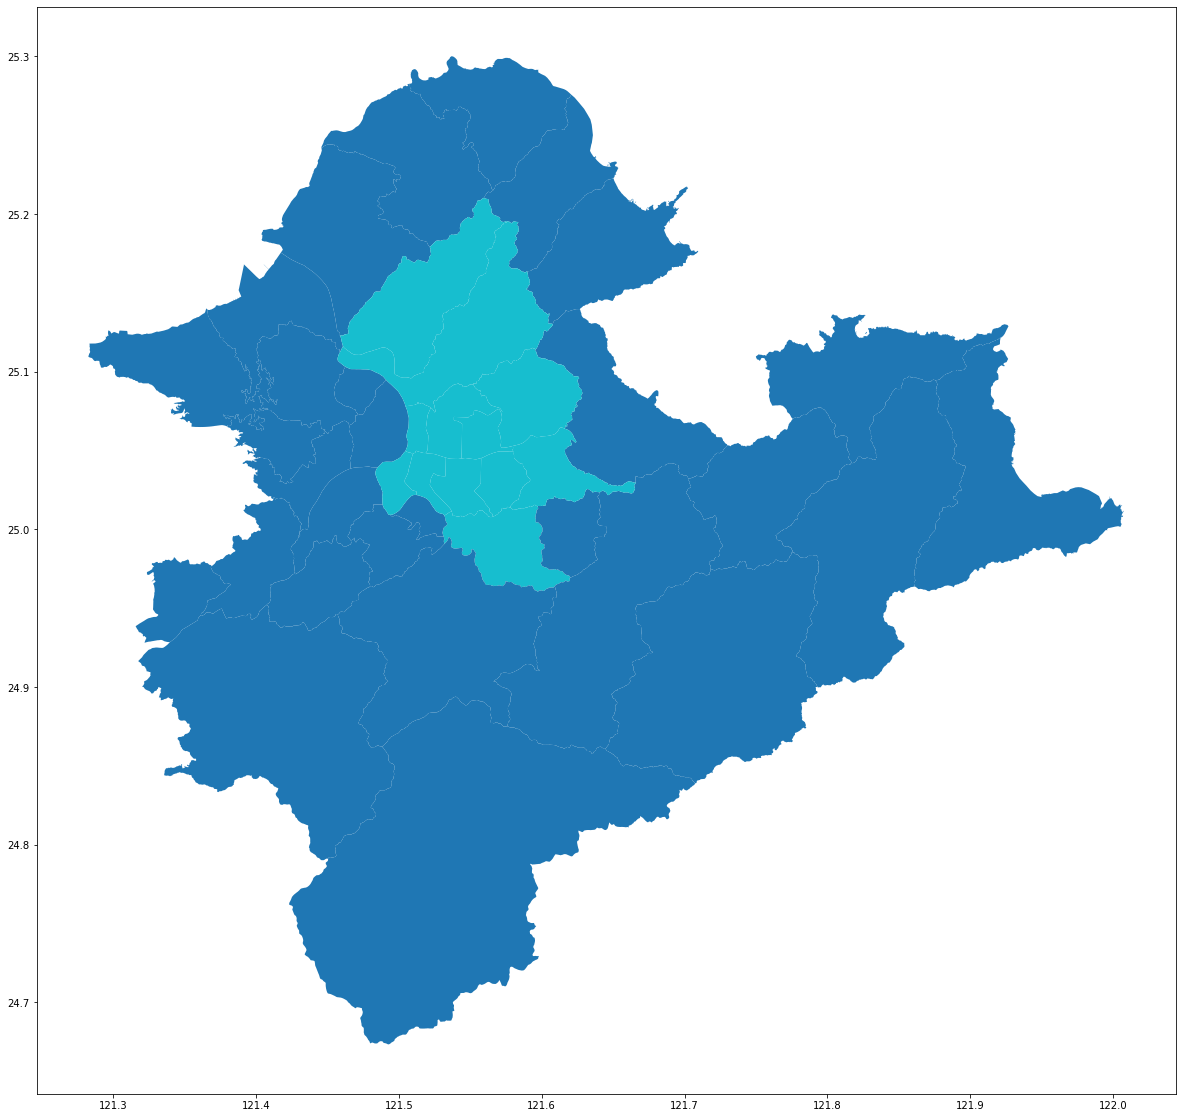

In [106]:
subset.plot(column='COUNTYNAME')

In [107]:
#增加單一經緯度去畫畫看，但失敗
# new=pd.Series({'TOWNID':'FF','TOWNCODE':'00','COUNTYNAME':'停車場','TOWNNAME':'某據點'
#               ,'TOWNENG':'PARKING','COUNTYID':'A','COUNTYCODE':63000
#               ,'geometry':'POLYGON ((121.510479 25.058263))'})
# subset=subset.append(new,ignore_index=True)   # ignore_index=True,表示不按原來的索引，從0開始自動遞增
# print(subset)

# subset = subset.drop(12)

In [ ]:
df_park = pd.read_csv('data/Parking_Taipei.csv',encoding='utf-8')
df_park.iloc[0]

In [ ]:
df_park.head()

In [ ]:
# from shapely.geometry import Point
# geom = [Point(xy) for xy in zip(df_park.TWD97X, df.TWD97Y)]

In [ ]:
# # 看看安裝包都哪去了
# import sys
# sys.path

#### 租環車熱點套用地圖顯示+時段分析

#### 大口客戶的個資圖（例如住址區域分佈,年齡分佈...）

#### 會員分類